## DEPTH FIRST SEARCH (3 MISSIONARY 3 CANNIBAL PROBLEM)

## DEFINING THE PROBLEM MATHEMATICALLY
---
$S=[s_1,s_2,s_3,s_4,s_5]$ 

$s_1$: the number of missionaries on the left side of the river

$s_2$: the number of cannibals on the left side of the river

$s_3$: the location of the boat, if it is 1/0 then it is on the left/right side

$s_4$: the number of missionaries on the right side of the river

$s_5$: the number of cannibals on the right side of the river

## Initial State:

$ S_0=[3,3,1,0,0] $

## Goal State:

$ S^*=[0,0,0,3,3] $


## CODE

In [2]:
def obtain_actions(S):
    s3=S[2]
    actions=[]
    if s3==1:
        s1=S[0]
        s2=S[1]

        for delta1 in range(s1+1):
            for delta2 in range(s2+1):
                if delta1+delta2<=2 and delta1+delta2>0:
                    actions.append([delta1,delta2])
    else:
        s4=S[3]
        s5=S[4]
        for delta4 in range(s4+1):
            for delta5 in range(s5+1):
                if delta4+delta5<=2 and delta4+delta5>0:
                    actions.append([delta4,delta5])
    return actions

In [3]:
S=[3,3,1,0,0]
obtain_actions(S)

[[0, 1], [0, 2], [1, 0], [1, 1], [2, 0]]

In [6]:
def next_state(S,action):
    s3=S[2]
    S_new=S[:]
    if s3==1:
        S_new[0]-=action[0]
        S_new[1]-=action[1]
        S_new[2]=0
        S_new[3]+=action[0]
        S_new[4]+=action[1]
    else:
        S_new[0]+=action[0]
        S_new[1]+=action[1]
        S_new[2]=1
        S_new[3]-=action[0]
        S_new[4]-=action[1]
    if (S_new[1]>S_new[0] and S_new[0]>0) or (S_new[4]>S_new[3] and S_new[3]>0):
        failed=True
    else:
        failed=False
    return S_new,failed
        

In [7]:
actions=obtain_actions(S)
next_state(S,actions[0])

([3, 2, 0, 0, 1], False)

In [8]:
for action in actions:
    print(next_state(S,action))

([3, 2, 0, 0, 1], False)
([3, 1, 0, 0, 2], False)
([2, 3, 0, 1, 0], True)
([2, 2, 0, 1, 1], False)
([1, 3, 0, 2, 0], True)


# DFS

In [9]:
def DFS(S,V,graph,goal_state=[0,0,0,3,3]):
    win=False
    if str(S) not in graph:
        graph[str(S)]=[]
        
    if S==goal_state:
        win=True
        print("You have reached the goal state!")
        return V,win,graph
    
    print("Current State:",S)
    actions=obtain_actions(S)
    for action in actions:
        S_new,failed=next_state(S,action)
        print("New state:{}|failed:{}|visited:{}".format(S_new,failed,str(S_new) in V))
        if str(S_new) not in V:
            V.append(str(S_new))
            graph[str(S)].append(str(S_new))
            if not failed:
                print("    Exploring")
                V,win,graph=DFS(S_new,V,graph)
                if win:
                    break
    return V,win,graph

In [10]:
S=[3,3,1,0,0]
V=[str(S)]
graph={}
V,win,graph=DFS(S,V,graph)

Current State: [3, 3, 1, 0, 0]
New state:[3, 2, 0, 0, 1]|failed:False|visited:False
    Exploring
Current State: [3, 2, 0, 0, 1]
New state:[3, 3, 1, 0, 0]|failed:False|visited:True
New state:[3, 1, 0, 0, 2]|failed:False|visited:False
    Exploring
Current State: [3, 1, 0, 0, 2]
New state:[3, 2, 1, 0, 1]|failed:False|visited:False
    Exploring
Current State: [3, 2, 1, 0, 1]
New state:[3, 1, 0, 0, 2]|failed:False|visited:True
New state:[3, 0, 0, 0, 3]|failed:False|visited:False
    Exploring
Current State: [3, 0, 0, 0, 3]
New state:[3, 1, 1, 0, 2]|failed:False|visited:False
    Exploring
Current State: [3, 1, 1, 0, 2]
New state:[3, 0, 0, 0, 3]|failed:False|visited:True
New state:[2, 1, 0, 1, 2]|failed:True|visited:False
New state:[2, 0, 0, 1, 3]|failed:True|visited:False
New state:[1, 1, 0, 2, 2]|failed:False|visited:False
    Exploring
Current State: [1, 1, 0, 2, 2]
New state:[1, 2, 1, 2, 1]|failed:True|visited:False
New state:[1, 3, 1, 2, 0]|failed:True|visited:False
New state:[2, 1, 

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

In [12]:
graph.keys()

dict_keys(['[3, 3, 1, 0, 0]', '[3, 2, 0, 0, 1]', '[3, 1, 0, 0, 2]', '[3, 2, 1, 0, 1]', '[3, 0, 0, 0, 3]', '[3, 1, 1, 0, 2]', '[1, 1, 0, 2, 2]', '[2, 2, 1, 1, 1]', '[0, 2, 0, 3, 1]', '[0, 3, 1, 3, 0]', '[0, 1, 0, 3, 2]', '[0, 2, 1, 3, 1]', '[0, 0, 0, 3, 3]'])

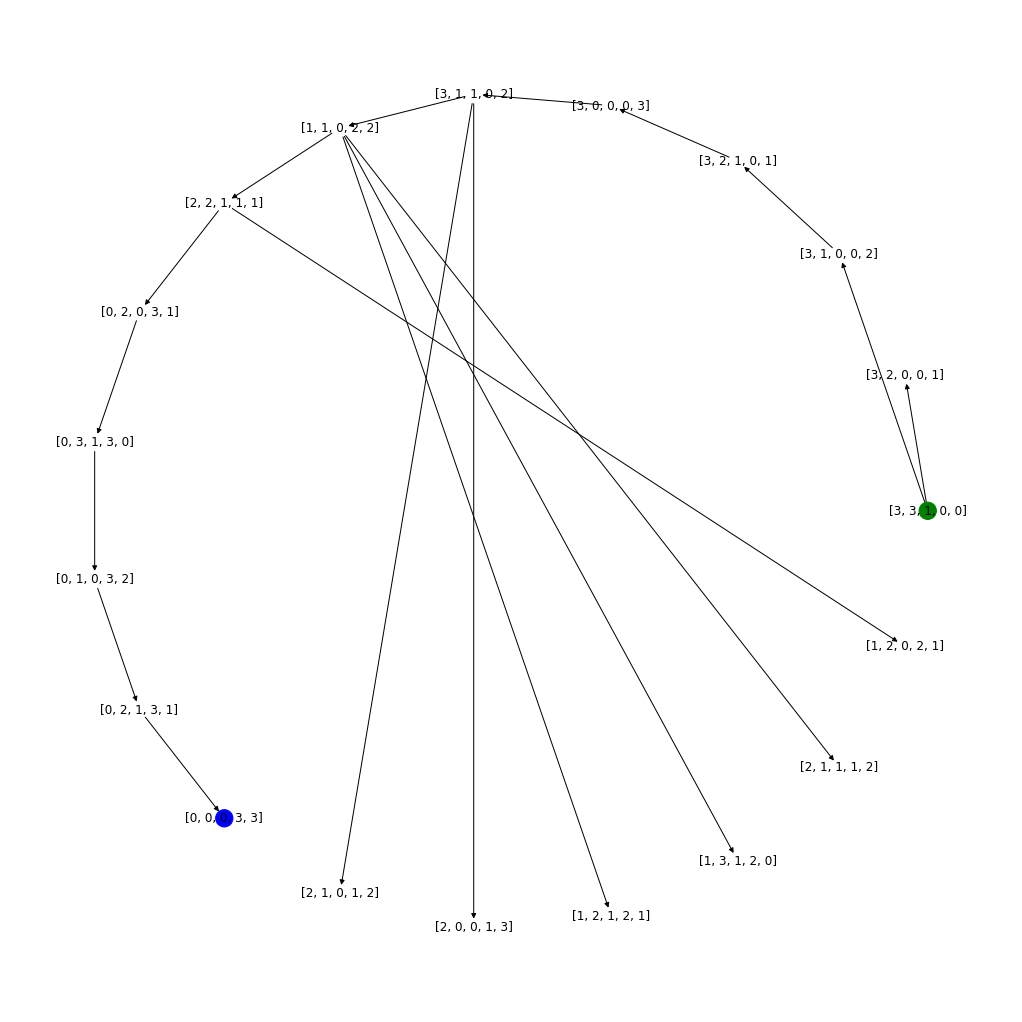

In [16]:
plt.figure(figsize=(14,14))
g = nx.DiGraph(graph)
color_map = []
for node in g:
    if node == '[3, 3, 1, 0, 0]':
        color_map.append('green')
    elif node =='[0, 0, 0, 3, 3]': 
        color_map.append('blue')
    else:
        color_map.append('white')
nx.draw(g,with_labels=True,node_color=color_map,\
        pos=nx.layout.circular_layout(g))
plt.show()